Saving heart.csv to heart.csv
First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non

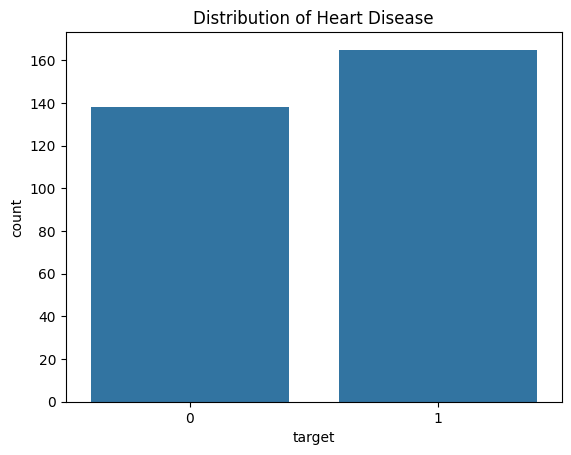

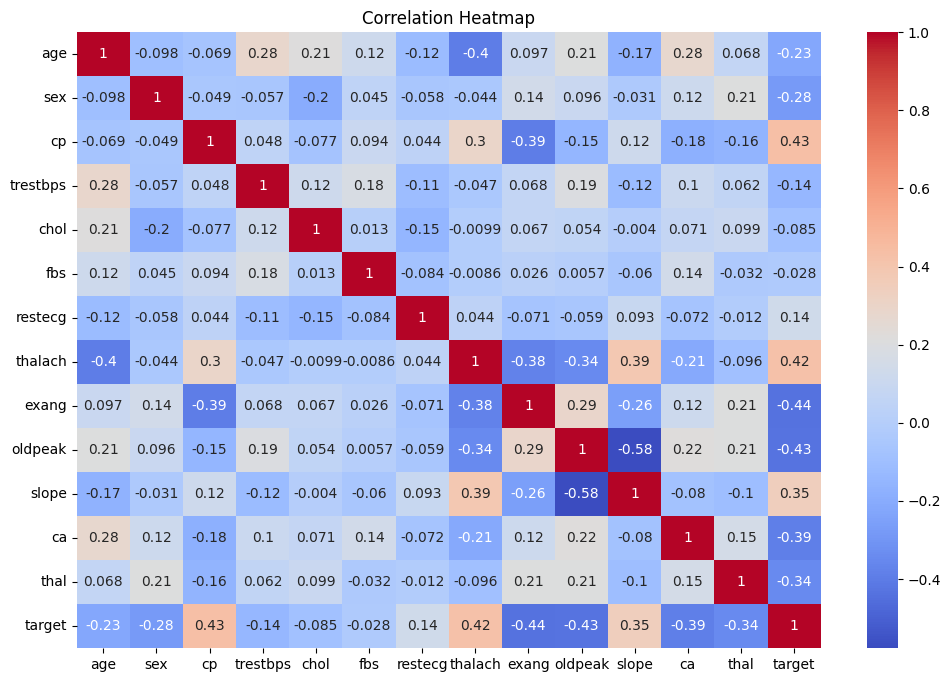

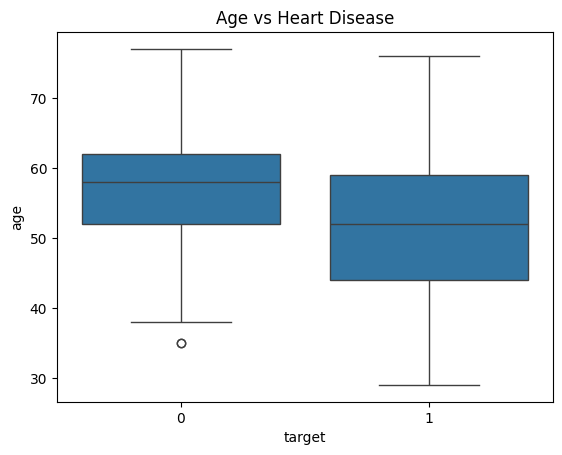


Logistic Regression Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Random Forest Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



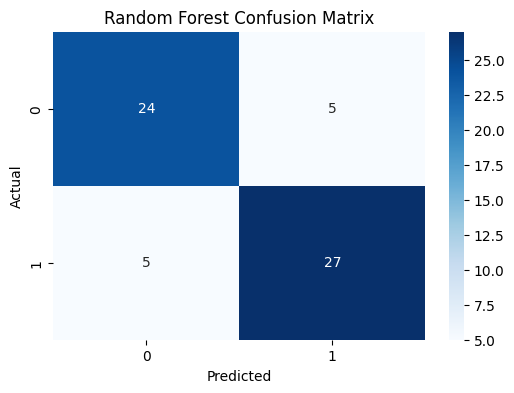

Prediction: Patient likely has heart disease ❤️


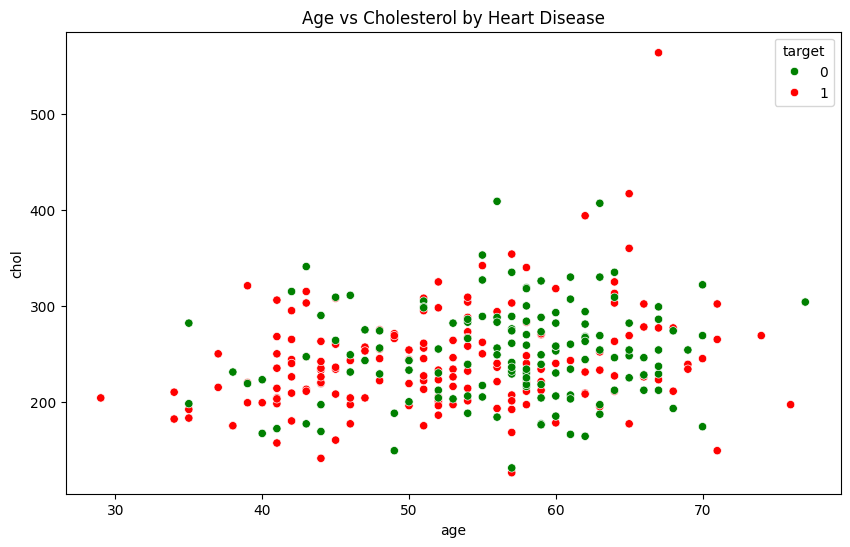

In [ ]:
# ====== 1️⃣ Import libraries ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ====== 2️⃣ Upload file to Colab ======
from google.colab import files

uploaded = files.upload()  # Select 'heart.csv' from your device

# ====== 3️⃣ Load the data ======
# Use the name of the first uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nCheck missing values:")
print(df.isnull().sum())

# ====== 4️⃣ Exploratory Data Analysis (EDA) ======
# Target distribution
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease")
plt.show()

#  Correlation heatmap between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Example: Relationship between age and heart disease
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

# ====== 5️⃣ Prepare data for modeling ======
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler # Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ====== 6️⃣ Build predictive models ======

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ====== 7️⃣ Example prediction for a new patient ======
# Synthetic data for a new patient
new_patient = pd.DataFrame({
    'age': [55],
    'sex': [1],
    'cp': [3],
    'trestbps': [140],
    'chol': [240],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

new_patient_scaled = scaler.transform(new_patient)
prediction = rf.predict(new_patient_scaled)

if prediction[0] == 1:
    print("Prediction: Patient likely has heart disease ❤️")
else:
    print("Prediction: Patient likely does NOT have heart disease ✅")

# ====== 8️⃣ Visualization  Additional ======
# Age vs Cholesterol colored by target
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='chol', hue='target', data=df, palette={0:'green',1:'red'})
plt.title("Age vs Cholesterol by Heart Disease")
plt.show()

